# Exploratory data analysis of Haberman Dataset. 

In [ ]:
## Description
# 1. Age of patient at time of diagnosis
# 2. Year of treatment
# 3. Auxiliary nodes detected
# 4. status of survival. 1=patient alive after 5 yrs, 2=patient died within 5 yrs.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
hbm = pd.read_csv('haberman.csv', header=None)
hbm.columns = ['age', 'year', 'aux_nodes', 'status']
print(hbm.columns)

#modifying status of survival. 1=alive after 5 years of traetment, 2=dead after 5 years of treatment.
hbm["status"] = hbm["status"].map({1:"alive", 2:"died"})


Index(['age', 'year', 'aux_nodes', 'status'], dtype='object')


# 2-D Scatter Plot of age w.r.t auxilary lymph nodes

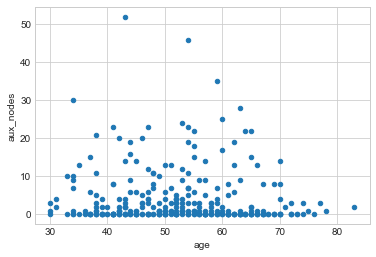

In [13]:
hbm.plot(kind='scatter', x='age', y='aux_nodes');
plt.show()

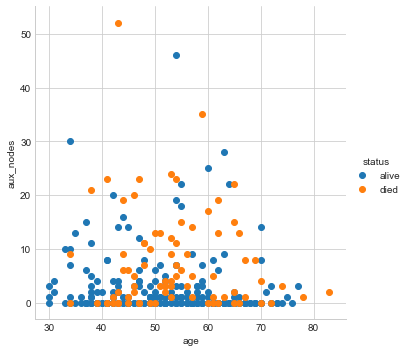

In [3]:
#2-D Scatter plot for survival status of patient 
#We compare age with no of aux node affected

sns.set_style("whitegrid");
sns.FacetGrid(hbm, hue="status", size=5) \
    .map(plt.scatter, 'age', 'aux_nodes') \
    .add_legend();
plt.show();

Observation:
We cannot distinguish any result clearly from the above 2-D scatter plot.

# Pair Plot

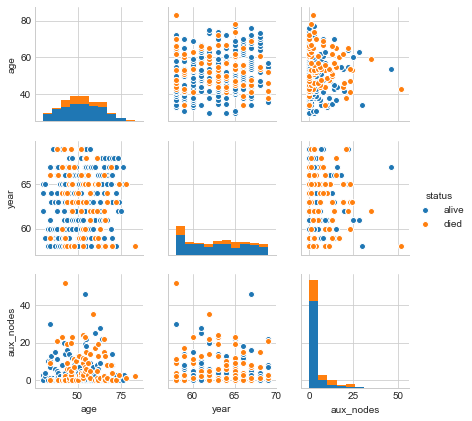

In [4]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hbm, hue="status", size=2);
plt.show()

Observation:
The above pairplot doesnt give any clear idea. The above observations are still valid here.

# Histogram, PDF, CDF

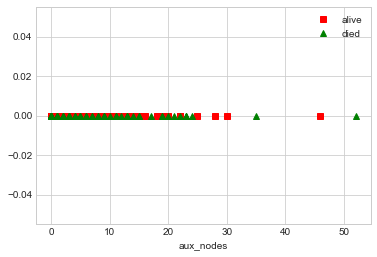

In [22]:
#1-D Scatter plot using one feature
#1-D Scatter plot of aux_nodes

hbm_alive = hbm.loc[hbm["status"] == "alive" ];
hbm_died = hbm.loc[hbm["status"] == "died"];

plt.plot(hbm_alive["aux_nodes"], np.zeros_like(hbm_alive["aux_nodes"]), 'rs', label='alive')
plt.plot(hbm_died["aux_nodes"], np.zeros_like(hbm_died["aux_nodes"]), 'g^', label='died')
plt.xlabel("aux_nodes")
plt.legend()
plt.show()


Observation:
Most of the auxiliary lymph nodes are concentrated in the range (0-25).

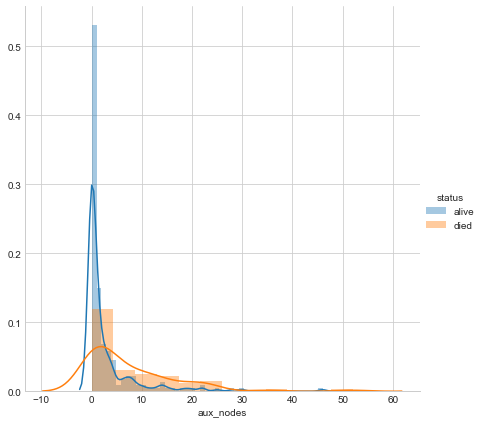

In [23]:
#1-D Histogram plot of aux-nodes
sns.FacetGrid(hbm, hue="status", size=6) \
    .map(sns.distplot, "aux_nodes") \
    .add_legend();
plt.show();

Observation:
Most of the Patients having aux-nodes 0, are alive after 5 years of operation. 

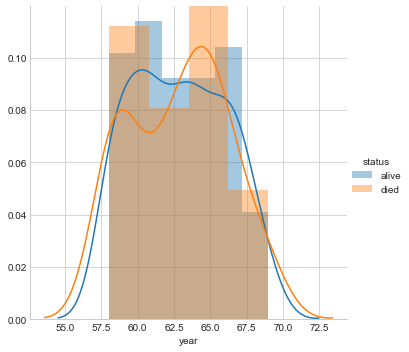

In [24]:
#1-D Histogram plot of year
sns.FacetGrid(hbm, hue="status", size=5) \
    .map(sns.distplot, "year") \
    .add_legend();
plt.show();

observation:
No significant result can be observed.

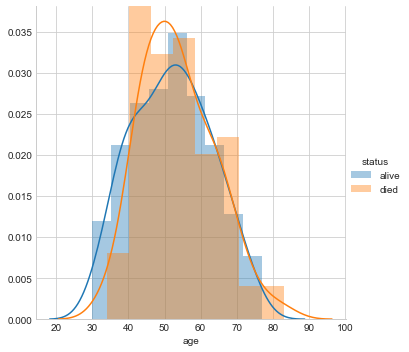

In [25]:
#1-D Histogram plot of age

sns.FacetGrid(hbm, hue="status", size=5) \
    .map(sns.distplot, "age") \
    .add_legend();
plt.show();

In [ ]:
observation:
No significant result can be observed.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


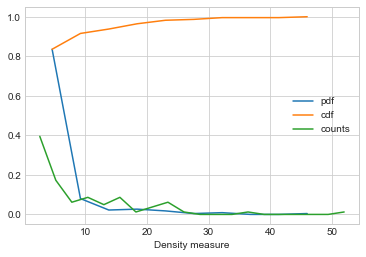

In [27]:
#CDF (Cumulative Distribution Function)
#Plotting CDF of aux nodes

counts, bin_edges = np.histogram(hbm_alive['aux_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="pdf");
plt.plot(bin_edges[1:], cdf, label="cdf")

counts, bin_edges = np.histogram(hbm_died['aux_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label="counts");
plt.xlabel("Density measure")
plt.legend()
plt.show();

# Mean, Varience and Std-dev

In [32]:
print("Means of Aux-Nodes: ")
print(np.mean(hbm_alive["aux_nodes"]))
print(np.mean(hbm_died["aux_nodes"]))

print("\nMeans of Age: ")
print(np.mean(hbm_alive["age"]))
print(np.mean(hbm_died["age"]))

print("\nMeans of Year of Treatment: ")
print(np.mean(hbm_alive["year"]))
print(np.mean(hbm_died["year"]))

Means of Aux-Nodes: 
2.7911111111111113
7.45679012345679

Means of Age: 
52.01777777777778
53.67901234567901

Means of Year of Treatment: 
62.86222222222222
62.82716049382716


In [35]:
print("Standard Deviation of aux nodes: ");
print(np.std(hbm_alive['aux_nodes']));
print(np.std(hbm_died['aux_nodes']));

print("\nStandard Deviation of age: ");
print(np.std(hbm_alive['age']));
print(np.std(hbm_died['age']));

Standard Deviation of aux nodes: 
5.857258449412131
9.128776076761632

Standard Deviation of age: 
10.98765547510051
10.10418219303131


# Median, Percentile, Quantile, IQR, MAD

In [43]:
import numpy as np
print("\nMedians of aux nodes:")
print(np.median(hbm_alive["aux_nodes"]))
print(np.median(hbm_died["aux_nodes"]))

print("\nMedians of age of patient:")
print(np.median(hbm_alive["age"]))
print(np.median(hbm_died["age"]))

print("\nMedians of year of treatment:")
print(np.median(hbm_alive["year"]))
print(np.median(hbm_died["year"]))


Medians of aux nodes:
0.0
4.0

Medians of age of patient:
52.0
53.0

Medians of year of treatment:
63.0
63.0


In [44]:
#Quantiles
print("\nQuantiles for aux nodes:")
print(np.percentile(hbm_alive["aux_nodes"],np.arange(0, 100, 25)))
print(np.percentile(hbm_died["aux_nodes"],np.arange(0, 100, 25)))

print("\nQuantiles for year:")
print(np.percentile(hbm_alive["year"],np.arange(0, 100, 25)))
print(np.percentile(hbm_died["year"],np.arange(0, 100, 25)))

print("\nQuantiles for age:")
print(np.percentile(hbm_alive["age"],np.arange(0, 100, 25)))
print(np.percentile(hbm_died["age"],np.arange(0, 100, 25)))



Quantiles for aux nodes:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Quantiles for year:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

Quantiles for age:
[30. 43. 52. 60.]
[34. 46. 53. 61.]


In [49]:
#Median absolute Deviation
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hbm_alive["aux_nodes"]))
print(robust.mad(hbm_died["aux_nodes"]))


Median Absolute Deviation
0.0
5.930408874022408


# Box plot and Whiskers

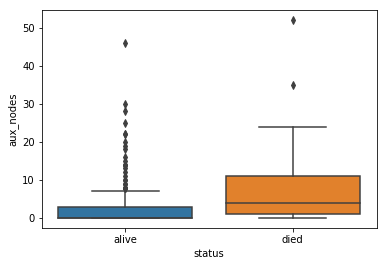

In [4]:
sns.boxplot(x='status', y='aux_nodes', data=hbm)
plt.show()

Observations:
1. since the quantiles (25% and 50%) in case of alive peoples are concentrated within zero. we can easily conclude that most of the patients having lymph nodes = 0 were alive after 5 years of treatment.
2. the patients having less lymph node affected were alive after 5 years of treatment.
3. the whiskers are much lower in case of alive peoples than the died ones. 
4. most of the died patients had higher auxiliary lymph nodes.

# Violin plots

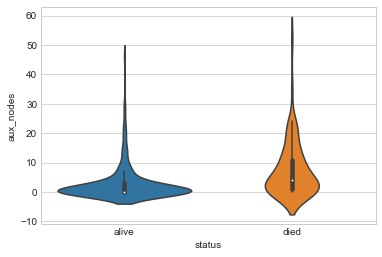

In [37]:
sns.violinplot(x="status", y='aux_nodes', data=hbm, size=8)
plt.show()

observations:
1. since the alive violin plot has fatter area on the range (0-5). so we can conclude that most of the patients in that area were alive after 5 years of treatment.
2. since the died violin plot has diversed area. so we can say that patients who died had variable auxiliary lymph nodes.


# Conclusions:

1. Maximum number of patients have auxiliary lymph nodes of 0.
2. Most of the patients are of age 52-53.
3. The year in which most of the patients are treated is 1963.
4. Most of the Patients having aux-nodes 0, are alive after 5 years of operation. 
5. The patients who had higher auxiliary lymph nodes died after 5 years of treatment.